# Introduction

Zomato is one of the key players in providing customers with a wide range of dining options. The restaurant industry in Bangalore, India, has experienced significant growth. To shed light on Bangalore's restaurant scene, this analysis attempts to investigate some of the most important aspects of Zomato restaurant data. The goal of this project is to analyze the restaurants in Banglore, India. When looking for food and restaurants in a particular area to order from and read reviews about, Zomato is one of the most popular apps. Zomato has not only made it possible to order food while relaxing at home, but it has also given users access to a single platform that provides additional restaurant information. Bangalore is the place to be a foodie, with young people, working professionals, and students occupying every available space. The city also contributes significantly to Zomato's national order volume. 

# Methods

## Datasets: 

The datasets used in this project are taken from Kaggle -"Zomato Dataset" and "Zomato Bangalore Restaurants 2022" containing information about restaurants in Banglore, India. Both datasets include details such as the Name of the restaurant, Online order availability, Booking table availability, location, and cost for 2 people.

## Data Pipeline:

1. Data Loading: Both the datasets were imported in Python using Pandas allowing to manipulation the data easily in a Python environment

2. Data Cleaning: The datasets were cleaned by using Pandas functions such as Dropna, Duplicated, etc. which helped in handling missing values removing duplicates, and correcting inconsistent data. 

3. Data Transformation: Certain fields were transformed such as cleaning the inconsistent data in the field Online_order and Book_Table which helped in statistical analysis and visualization. 

# Results

The table provided below gives a glimpse of the cleaned dataset 1 "Zomato Dataset"

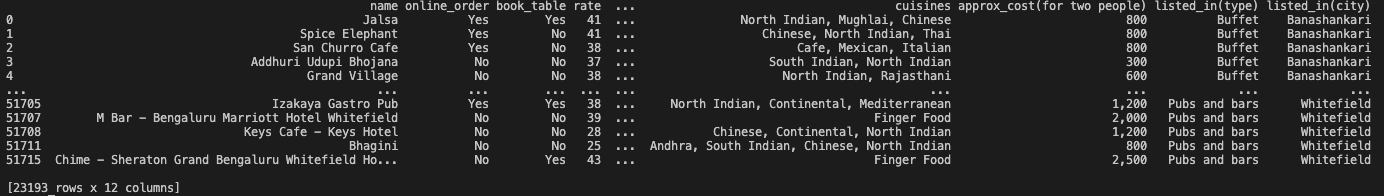

The table provided below gives a glimpse of the cleaned dataset 2 "Zomato Bangalore Restaurants 2022"

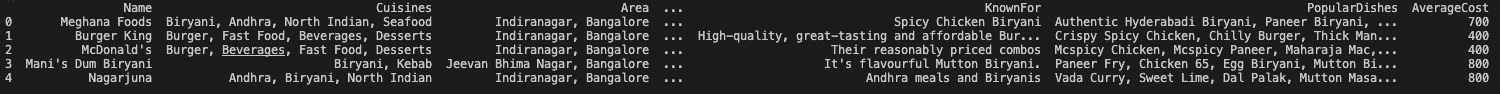

# Discussion/Conclusions:

In conclusion, this analysis provides meaningful information about Zomato restaurants in Banglore. Future work could involve covering additional datasets for a more comprehensive understanding and exploring trends in user preferences. Restaurant owners hoping to accommodate changing tastes and preferences as well as customers looking for a variety of dining experiences can both benefit from an understanding of these changes.